# Spotify L&D Project

### Import and Data Collection

In [1]:
import spotipy
import numpy as np
import pandas as pd
import seaborn as sb
import random
from numpy.linalg import norm
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
cid = '77f4837cb8e94faa91b849183fc3240b'
secret = '73da295b1e0744bdb651514c62b13268'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [3]:
# Tops Songs 2020
# playlist_link = "https://open.spotify.com/playlist/37i9dQZF1EM9DVbOg6CjfI?si=f57f3dbd0c7c4342"

# Tops Songs 2021
#playlist_link = "https://open.spotify.com/playlist/37i9dQZF1EUMDoJuT8yJsl"

# Ballie Playlist
playlist_link = "https://open.spotify.com/playlist/2RtN8YsLEFZhcrkSiGc3FQ" 

playlist_URI = playlist_link.split("/")[-1].split("?")[0]
playlist_URI

'2RtN8YsLEFZhcrkSiGc3FQ'

In [4]:
playlist_features_list = [
    "track_id",
    "track_name",
    "artist",
    "album",
    "tempo",
    "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence",
    "time_signature"
    ]

df = pd.DataFrame(columns = playlist_features_list)
    
playlist = sp.user_playlist_tracks("spotify", playlist_URI)["items"]
for track in playlist:
    # Create empty dict
    playlist_features = {}
    # Get metadata
    playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
    playlist_features["album"] = track["track"]["album"]["name"]
    playlist_features["track_name"] = track["track"]["name"]
    playlist_features["track_id"] = track["track"]["id"]
    
    # Get audio features
    audio_features = sp.audio_features(playlist_features["track_id"])[0]
    for feature in playlist_features_list[4:]:
        playlist_features[feature] = audio_features[feature]
    
    # Concat the dfs
    track_df = pd.DataFrame(playlist_features, index = [0])
    df = pd.concat([df, track_df], ignore_index = True)
    
    
    results = pd.concat([df, track_df], ignore_index = True)

results

,track_id,track_name,artist,album,tempo,duration_ms,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,time_signature
0,2nLtzopw4rPReszdYBJU6h,Numb,Linkin Park,Meteora,110.018,185587,0.496,0.863,9,-4.153,1,0.0381,0,0.6390,0.243,4
1,4lAYMPLPFOovwTCmtTt9b5,I'm A Believer,Smash Mouth,Smash Mouth (International Version),82.331,185307,0.549,0.981,11,-3.558,0,0.0590,0.000002,0.4380,0.873,4
2,5fVZC9GiM4e8vu99W0Xf6J,How to Save a Life,The Fray,How To Save A Life,122.035,262533,0.640,0.743,10,-4.080,1,0.0379,0,0.1010,0.361,4
3,7oK9VyNzrYvRFo7nQEYkWN,Mr. Brightside,The Killers,Hot Fuss,148.017,222587,0.356,0.924,1,-3.740,1,0.0808,0,0.0953,0.232,4
4,3sYSUid2zJmRs39upbsVNQ,When You Were Young - Mainstream,The Killers,Sam's Town (France),130.435,220427,0.467,0.988,11,-3.313,1,0.1120,0.0484,0.2800,0.321,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0cGG2EouYCEEC3xfa0tDFV,Tainted Love,Soft Cell,Non-Stop Erotic Cabaret,144.438,153800,0.500,0.501,0,-8.284,0,0.0376,0,0.2600,0.623,4
97,2JO3HwMRPeya8bXbtbyPcf,Love Will Tear Us Apart,Joy Division,The Best Of,146.754,206867,0.443,0.956,2,-6.198,1,0.0511,0.825,0.1350,0.909,4
98,1qAn5FdJiog9J76fc0Gqwu,Sometimes,Erasure,The Circus,110.384,219907,0.638,0.806,1,-10.106,1,0.0342,0.0434,0.2770,0.671,4
99,7qm1JpihtROAIU1XpvqYHS,Human - Edit,The Human League,The Greatest Hits,101.400,228867,0.636,0.559,8,-10.313,1,0.0249,0.000754,0.0562,0.512,4


### Visualising Playlists

In [5]:
lil_graph_list = results[[
    "danceability",
    "energy",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence"
    ]]

big_graph_list = results[[
    "tempo",
    "duration_ms",
    "key",
    "loudness",
    "mode",
    "time_signature"
    ]]

graph_list = results[[
    "tempo",
    "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence"
    # "time_signature"
        ]]


graph_list

,tempo,duration_ms,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence
0,110.018,185587,0.496,0.863,9,-4.153,1,0.0381,0,0.6390,0.243
1,82.331,185307,0.549,0.981,11,-3.558,0,0.0590,0.000002,0.4380,0.873
2,122.035,262533,0.640,0.743,10,-4.080,1,0.0379,0,0.1010,0.361
3,148.017,222587,0.356,0.924,1,-3.740,1,0.0808,0,0.0953,0.232
4,130.435,220427,0.467,0.988,11,-3.313,1,0.1120,0.0484,0.2800,0.321
...,...,...,...,...,...,...,...,...,...,...,...
96,144.438,153800,0.500,0.501,0,-8.284,0,0.0376,0,0.2600,0.623
97,146.754,206867,0.443,0.956,2,-6.198,1,0.0511,0.825,0.1350,0.909
98,110.384,219907,0.638,0.806,1,-10.106,1,0.0342,0.0434,0.2770,0.671
99,101.400,228867,0.636,0.559,8,-10.313,1,0.0249,0.000754,0.0562,0.512


In [6]:
from sklearn.preprocessing import MinMaxScaler
# 
min_max_scaler = MinMaxScaler()

graph_list.loc[:]=min_max_scaler.fit_transform(graph_list.loc[:])

/var/folders/3c/gf4t6v4j4gs7cz4qhb0z7_dc0000gp/T/ipykernel_10934/3964451655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_list.loc[:]=min_max_scaler.fit_transform(graph_list.loc[:])
/var/folders/3c/gf4t6v4j4gs7cz4qhb0z7_dc0000gp/T/ipykernel_10934/3964451655.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  graph_list.loc[:]=min_max_scaler.fit_transform(graph_list.loc[:])


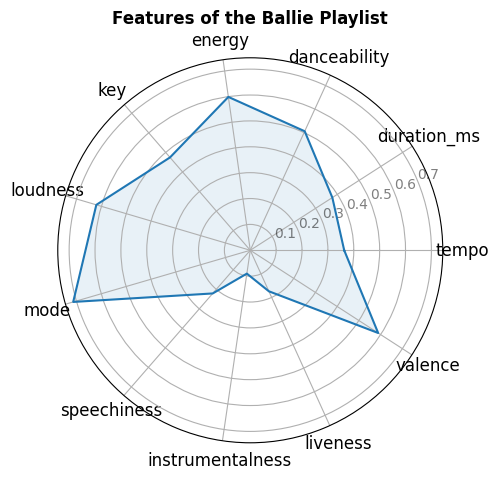

In [7]:
# plot size
fig=plt.figure(figsize=(5,5))

# convert column names into a list
categories=list(graph_list.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(graph_list.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*3.14 for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.1)

plt.title('Features of the Ballie Playlist', size=12, horizontalalignment='center', weight = 'bold')

plt.xticks(angles[:-1],categories, size=12)
plt.yticks(color='black',size=10, alpha = 0.5)
plt.style.use('default') # Because dark mode everything

plt.show()

# Recommending music based on Mood

In [9]:
results.head()

,track_id,track_name,artist,album,tempo,duration_ms,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,time_signature
0,2nLtzopw4rPReszdYBJU6h,Numb,Linkin Park,Meteora,110.018,185587,0.496,0.863,9,-4.153,1,0.0381,0,0.6390,0.243,4
1,4lAYMPLPFOovwTCmtTt9b5,I'm A Believer,Smash Mouth,Smash Mouth (International Version),82.331,185307,0.549,0.981,11,-3.558,0,0.0590,0.000002,0.4380,0.873,4
2,5fVZC9GiM4e8vu99W0Xf6J,How to Save a Life,The Fray,How To Save A Life,122.035,262533,0.640,0.743,10,-4.080,1,0.0379,0,0.1010,0.361,4
3,7oK9VyNzrYvRFo7nQEYkWN,Mr. Brightside,The Killers,Hot Fuss,148.017,222587,0.356,0.924,1,-3.740,1,0.0808,0,0.0953,0.232,4
4,3sYSUid2zJmRs39upbsVNQ,When You Were Young - Mainstream,The Killers,Sam's Town (France),130.435,220427,0.467,0.988,11,-3.313,1,0.1120,0.0484,0.2800,0.321,4


### Create Mood Vector

In [10]:
results["mood_vec"] = results[["valence", "energy"]].values.tolist()
results["mood_vec"].head()

0    [0.243, 0.863]
1    [0.873, 0.981]
2    [0.361, 0.743]
3    [0.232, 0.924]
4    [0.321, 0.988]
Name: mood_vec, dtype: object

# Recommendation Algorithm

The algorithm that finds similar tracks to a given input track is now very simple:
1. Crawl the track's valence and energy values from the Spotify API.
2. Compute the distances of the input track to each track in the reference dataset.
3. Sort the reference track from lowest to highest distance.
4. Return the n most similar tracks.

In [11]:
def recommend(track_id, ref_df, sp, n_recs = 5):
    
    # Crawl valence and arousal of given track from spotify api
    track_features = sp.audio_features(track_id)
    track_features = pd.DataFrame(track_features) # Convert list to a dataframe so we can convert to an array
    track_moodvec = np.array([track_features['valence'], track_features['energy']])
    
    # Compute distances to all reference tracks
    ref_df["distances"] = ref_df["mood_vec"].apply(lambda x: norm(track_moodvec-np.array(x)))
    # Sort distances from lowest to highest
    ref_df_sorted = ref_df.sort_values(by = "distances", ascending = True)
    # If the input track is in the reference set, it will have a distance of 0, but should not be recommendet
    ref_df_sorted = ref_df_sorted[ref_df_sorted["track_id"] != track_id]
    
    # Return n recommendations
    return ref_df_sorted.iloc[:n_recs]

In [12]:
track1 = random.choice(results["track_id"])
recommend(track1, results, sp, n_recs = 2)

,track_id,track_name,artist,album,tempo,duration_ms,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,time_signature,mood_vec,distances
40,1zb6cUXJ1RtnOrtn3dgo6h,Song For Whoever - Single Version,The Beautiful South,Carry On Up The Charts,137.226,244667,0.520,0.377,6,-13.798,0,0.0367,0,0.0828,0.275,4,"[0.275, 0.377]",0.245691
32,4S1VYqwfkLit9mKVY3MXoo,Forever Young,Alphaville,Forever Young,136.822,226706,0.489,0.483,9,-9.466,0,0.0275,0.0028,0.2360,0.333,4,"[0.333, 0.483]",0.328457


# Comparing a song against its recommendations

In [13]:
# Recommendation against any song below
# The output below simply gives us the songs our algorithm recommends based , but how can we show the similarities of the songs?

my_song = 'https://open.spotify.com/track/3EYOJ48Et32uATr9ZmLnAo?si=f13c6927b63e4265' # Input the link to your song of choice here
track1 = my_song.split("/")[-1].split("?")[0]
recommendations = recommend(track1, results, sp) 
recommendations

,track_id,track_name,artist,album,tempo,duration_ms,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,time_signature,mood_vec,distances
44,1xShPgQbOUa98avWJQFDBY,Personal Jesus - Original Single Version,Depeche Mode,Personal Jesus,129.983,224907,0.637,0.682,11,-11.625,1,0.0366,0.0234,0.0473,0.714,4,"[0.714, 0.682]",0.092054
27,4QeKhvIibhOep7yMGQKCRZ,Come with me now,Various Artists,Soundtrack Club de Cuervos,103.971,211626,0.661,0.729,10,-5.561,0,0.0486,0.00002,0.0578,0.719,4,"[0.719, 0.729]",0.093242
21,1x8AFBt9UEMRY41fSxi7aA,Good Life,OneRepublic,Waking Up,94.988,253307,0.634,0.690,6,-7.804,1,0.0520,0,0.1320,0.645,4,"[0.645, 0.69]",0.122581
42,6N7gPTru90HYLRUIVDQ185,More Than This,Roxy Music,Avalon,128.505,270652,0.653,0.666,6,-7.808,1,0.0249,0.0466,0.1390,0.765,4,"[0.765, 0.666]",0.132008
38,3yD272quA0vqP500G8qEX5,Alive And Kicking,Simple Minds,Alive And Kicking,103.105,287133,0.602,0.694,0,-11.337,1,0.0313,0.000207,0.1640,0.619,4,"[0.619, 0.694]",0.149847


In [14]:
# Firstly, it'd be great to get information about the track being put forward
song_details = sp.track(track1)
song_details = song_details.items()
song_details = pd.DataFrame(song_details)
print("Name of Song:", song_details.iloc[11, 1])
sp.audio_features(track1) 

Name of Song: Roxanne


[{'danceability': 0.618,
  'energy': 0.748,
  'key': 0,
  'loudness': -8.905,
  'mode': 1,
  'speechiness': 0.358,
  'acousticness': 0.0384,
  'instrumentalness': 4.1e-06,
  'liveness': 0.0473,
  'valence': 0.663,
  'tempo': 134.114,
  'type': 'audio_features',
  'id': '3EYOJ48Et32uATr9ZmLnAo',
  'uri': 'spotify:track:3EYOJ48Et32uATr9ZmLnAo',
  'track_href': 'https://api.spotify.com/v1/tracks/3EYOJ48Et32uATr9ZmLnAo',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3EYOJ48Et32uATr9ZmLnAo',
  'duration_ms': 191947,
  'time_signature': 4}]

In [15]:
graph_list_recs = recommendations[[
    "tempo",
    "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence"
    # "time_signature"
        ]]


graph_list_recs

,tempo,duration_ms,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence
44,129.983,224907,0.637,0.682,11,-11.625,1,0.0366,0.0234,0.0473,0.714
27,103.971,211626,0.661,0.729,10,-5.561,0,0.0486,0.00002,0.0578,0.719
21,94.988,253307,0.634,0.690,6,-7.804,1,0.0520,0,0.1320,0.645
42,128.505,270652,0.653,0.666,6,-7.808,1,0.0249,0.0466,0.1390,0.765
38,103.105,287133,0.602,0.694,0,-11.337,1,0.0313,0.000207,0.1640,0.619


In [16]:
from sklearn.preprocessing import MinMaxScaler
# 
min_max_scaler = MinMaxScaler()

graph_list_recs.loc[:]=min_max_scaler.fit_transform(graph_list_recs.loc[:])

/var/folders/3c/gf4t6v4j4gs7cz4qhb0z7_dc0000gp/T/ipykernel_10934/4278700800.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_list_recs.loc[:]=min_max_scaler.fit_transform(graph_list_recs.loc[:])
/var/folders/3c/gf4t6v4j4gs7cz4qhb0z7_dc0000gp/T/ipykernel_10934/4278700800.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  graph_list_recs.loc[:]=min_max_scaler.fit_transform(graph_list_recs.loc[:])


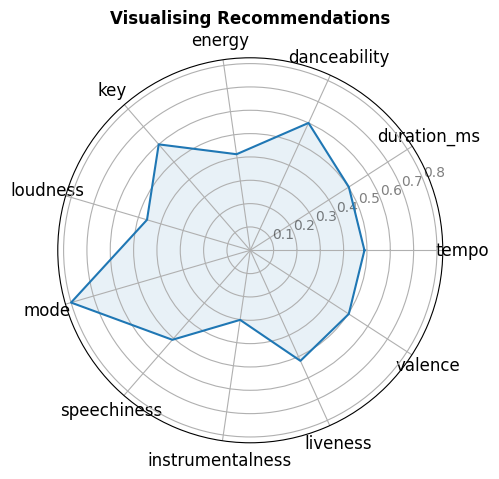

In [17]:
# plot size
fig=plt.figure(figsize=(5,5))

# convert column names into a list
categories=list(graph_list_recs.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(graph_list_recs.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*3.14 for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.1)

plt.title('Visualising Recommendations', size=12, horizontalalignment='center', weight = 'bold')

plt.xticks(angles[:-1],categories, size=12)
plt.yticks(color='black',size=10, alpha = 0.5)
plt.style.use('default')

plt.show()